In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date')
df.tail()

,value
date,
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918
2019-12-02,220144
2019-12-03,158549


###Clean the date

In [13]:
df = df[(df.value >= df.value.quantile(0.025))&
        (df.value <= df.value.quantile(0.975))]

#turn the index from dtype='object' to dtype='datetime64[ns]'
df.index = pd.to_datetime(df.index)

###Line Plot

(array([16983., 17167., 17348., 17532., 17713., 17897., 18078., 18262.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

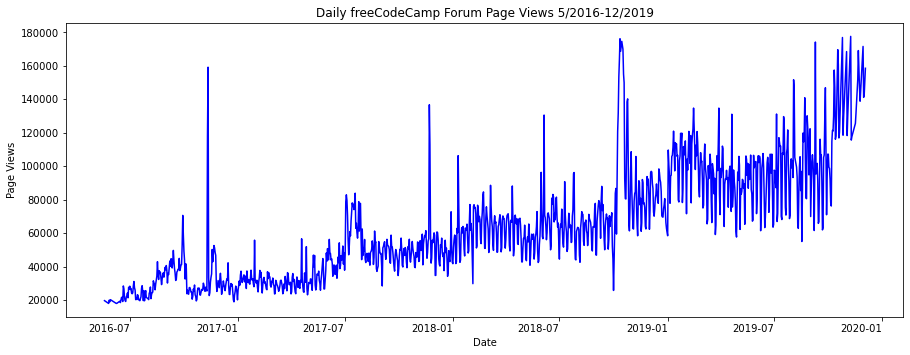

In [14]:
line_plot = df.plot(figsize=(15,6), title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019', xlabel='Date', ylabel='Page Views', legend=None, c='blue')
plt.xticks(rotation=0)

###Bar Plot

In [15]:
mask = df.copy()
mask['year'] = mask.index.year
mask['month'] = mask.index.month_name()
mask.head()

,value,year,month
date,,,
2016-05-19,19736,2016,May
2016-05-26,18060,2016,May
2016-05-27,19997,2016,May
2016-05-28,19044,2016,May
2016-05-29,20325,2016,May


In [16]:
# mask = df.groupby(by=['year', 'month']).mean()
mask = mask.groupby(by=['year', 'month'], as_index=False).mean()
mask.head()

,year,month,value
0,2016,August,31049.193548
1,2016,December,27832.419355
2,2016,July,24109.678571
3,2016,June,21875.105263
4,2016,May,19432.400000


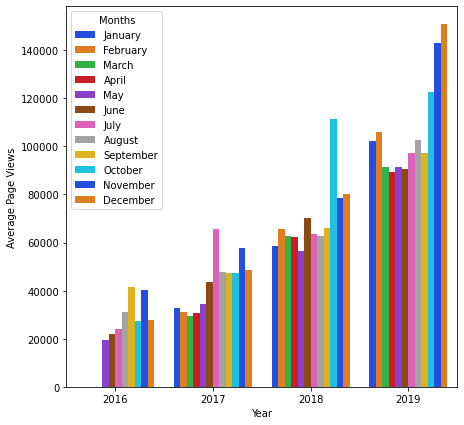

In [17]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
barplot = sns.barplot(data=mask, x='year', y='value', hue='month', palette='bright', hue_order=months)
barplot.set_xlabel('Year')
barplot.set_ylabel('Average Page Views')
plt.gcf().set_size_inches(7,7)
barplot.legend(title= 'Months',loc='upper left')

###Box Plot



In [18]:
mask = df.copy()
mask.index = pd.to_datetime(mask.index)
mask['year'] = mask.index.year
mask['month'] = mask.index.month_name().str[:3]
mask.tail()

,value,year,month
date,,,
2019-11-24,138875,2019,Nov
2019-11-29,171584,2019,Nov
2019-11-30,141161,2019,Nov
2019-12-01,142918,2019,Dec
2019-12-03,158549,2019,Dec


In [19]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
mask['month'] = pd.Categorical(mask['month'], categories=months, ordered=True)

Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')

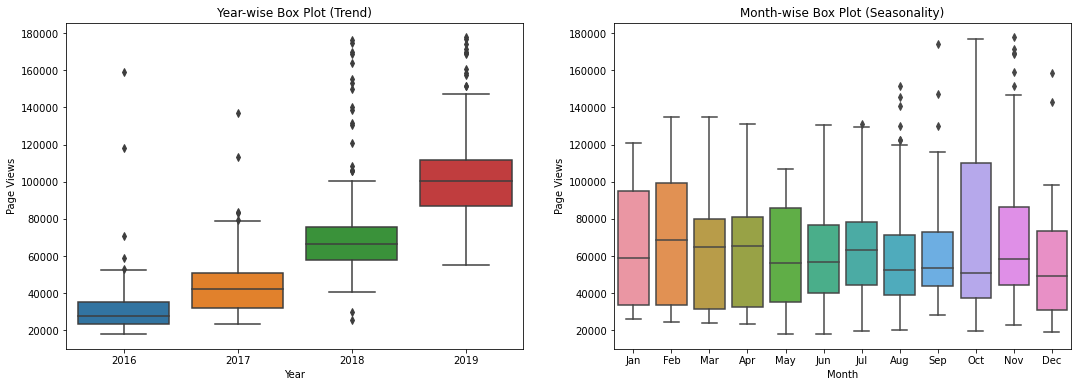

In [20]:
plt.figure(figsize=(18,6))

fig = plt.subplot(1,2,1)
sns.boxplot(data=mask, x='year', y='value')
fig.set_xlabel('Year')
fig.set_ylabel('Page Views')
fig.set_title('Year-wise Box Plot (Trend)')

fig2 = plt.subplot(1,2,2)
sns.boxplot(data=mask, x='month', y='value')
fig2.set_xlabel('Month')
fig2.set_ylabel('Page Views')
fig2.set_title('Month-wise Box Plot (Seasonality)')